# Neural Networks with TensorFlow and Keras

텐서플로우는 Keras API를 표준 API로 채택하여 신경망 모형을 간단히 구현할 수 있다. 

## Import Resources

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf


In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
print(' TensorFlow version:', tf.__version__)
print(' tf.keras version:', tf.keras.__version__)
print(' Running on GPU' if tf.test.is_gpu_available() else ' GPU device not found. Running on CPU')

 TensorFlow version: 2.10.0
 tf.keras version: 2.10.0
 GPU device not found. Running on CPU


## Load the Dataset

MNIST dataset 은 greyscale 이미지로, 손으로 쓴 숫자 데이터 셋이다. 각각의 image는 28x28 pixels 크기이다. 

<img src='../assets/mnist.png'>

우리의 목표는 신경망 모형을 생성하여 각 이미지에 해당 하는 숫자를 분류하는 것이다. 


다음 코드를 사용하면 MNIST dataset을 load 할 수 있다. 

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Inspect the Dataset

x_train에는 총 60000개의 28×28 크기의 이미지가 담겨 있다. y_train에는 이 x_train의 60000개에 대한 값(0~9)이 담겨 있는 레이블 데이터셋이다. 그리고 x_train과 y_train은 각각 10000개의 이미지와 레이블 데이터셋이다. 

총 데이터의 갯수를 확인하고 임의로 1개의 데이터 셋을 화면에 출력해본다.

In [6]:
# train image 데이터 셋
x_train.shape

(60000, 28, 28)

In [7]:
# label
y_train.shape

(60000,)

In [8]:
# test image 데이터 셋
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
num_classes = 10
print('There are {:,} classes in our dataset'.format(num_classes))

num_training_examples = x_train.shape[0]
print('\nThere are {:,} images in the training set'.format(num_training_examples))

There are 10 classes in our dataset

There are 60,000 images in the training set


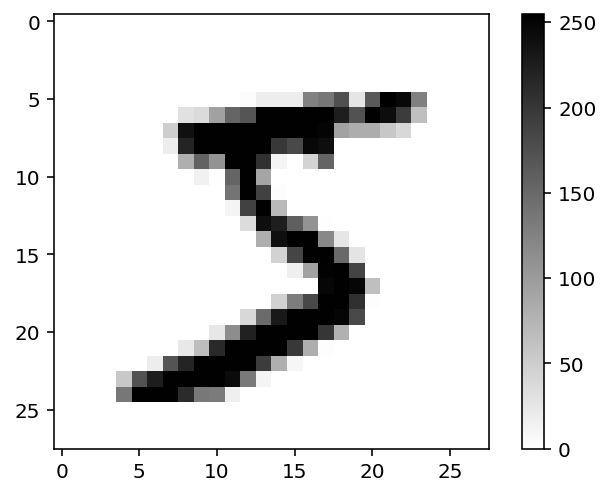

In [11]:
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

### scaling
pixel values 값의 범위는 `[0, 255]` 이다. 신경망 모형의 입력에 맞도록 normalize 해야 한다. 이를 위해서 pixel values를 255로 나눈다.

In [12]:
X_train = x_train / 255.0
X_test = x_test / 255.0

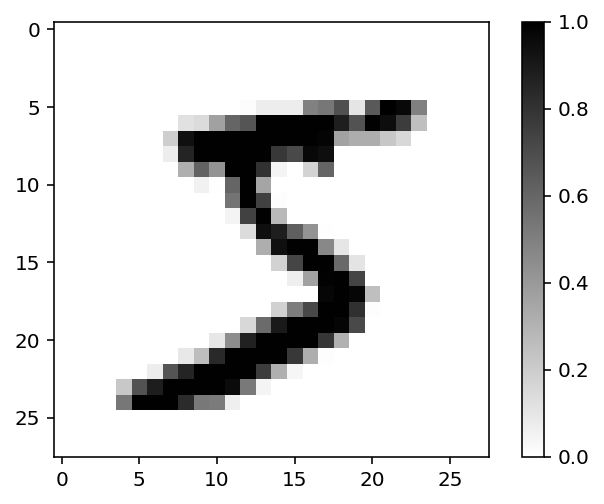

In [13]:
plt.figure()
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

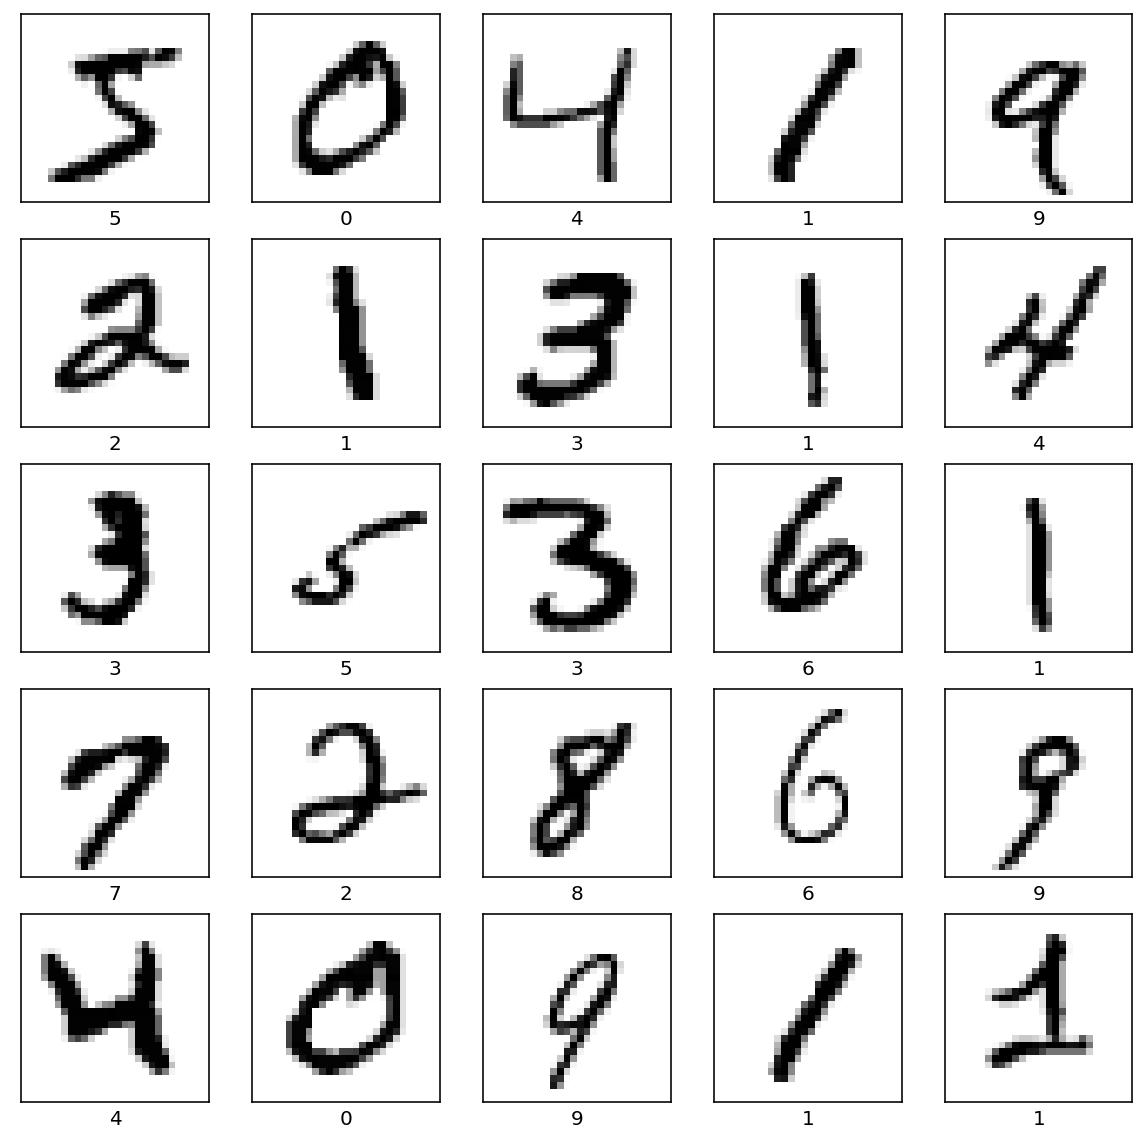

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Building Neural Networks with TensorFlow and Keras


Keras는 neural networks를 구성하고 train하기 위한 high-level API이다. `tf.keras`는 TensorFlow에서 Keras API 구현체이다. Keras에서는 **layers** 모듈을 쌓아 올려 network를 구성한다. 대부분의 경우 **Sequential** model을 사용하면 간단하게 구현 가능하다. TensorFlow에서 sequential model은`tf.keras.Sequential`를 사용하여 구현한다. 


Keras sequential model을 사용하여 fully-connected neural network를 구현해 보자.

* **Input Layer:** `tf.keras.layers.Flatten` — 이 layer는 28 $\times$ 28 pixels의 2d-array 를 1차원의 784 pixels (28 $\times$ 28 = 784)로 변환한다. 첫번째 layer에서 input tensors의 shape를 `input_shape` 옵션으로 지정한다. 주의할 점은 batch size를 지정하지 않아도 된다는 점이다. shape는 정수 또는 `None`으로 지정할 수 있는데 `None`은 어떤 양의 정수가 입력으로 들어 올 수 있다는 뜻이다.

* **Hidden Layer:** `tf.keras.layers.Dense` — fully-connected (densely connected라고도 함)layer. hidden layer를 구성하는 hidden unit(=neurons, nodes) 의 갯수와 activation함수를 명시적으로 지정한다. Keras는 첫 번째 레이어를 제외한 모든 레이어에 대해서 자동으로 shape을 계산하므로 입력 텐서의 모양을 지정할 필요가 없다. 이번 예제 경우에는`sigmoid` activation 함수와 `256`개의 뉴런을 사용할 것이다.

* **Output Layer:** `tf.keras.layers.Dense` — 10개의 뉴런을 가지는 fully-connected layer 로 구성한다. *softmax* activation function을 활성화 함수로 사용한다. 소프트맥스 함수에 의해 각 class의 확률값을 리턴한다.

In [15]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(256, activation = 'sigmoid'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Your Turn to Build a Neural Network

<img src="../assets/mlp_mnist.png" width=600px>

> **실습하기:** 784 input units과 128 units의 hidden layer 를 생성하는데 ReLU activation를 사용하시오.그 다음의 hidden layer 는 64 units과 ReLU activation 함수를 사용ㅎ시오. 마지막  output layer는 units과  softmax activation function를 사용하시오.  ReLU activation function는 `activation = 'relu'` 설정을 사용하시오.

In [16]:

## Solution
my_model_1 = tf.keras.Sequential([
             tf.keras.layers.Flatten(input_shape = (28,28)),
             tf.keras.layers.Dense(128, activation = 'relu'),
             tf.keras.layers.Dense(64, activation = 'relu'),
             tf.keras.layers.Dense(10, activation = 'softmax')
])

my_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


## Activation Functions

activation 함수로는 sigmoid, softmax, tanh 함수등을 사용할 수 있다. 

activation function는 non-linear함수이다. 다음은 일반적으로 활용되는 activation functions이다: 

<img src="../assets/activation.png" width=700px>

일반적으로 hidden layers의 activation 함수는 ReLU를 사용한다.

## Looking at the Weights and Biases

Keras는 자동으로 weights 와 biases를 초기화한다. `get_weights` method를 사용하여 weight와 bias를 확인할 수 있다. 

In [17]:
model_weights_biases = model.get_weights()

print(type(model_weights_biases))

<class 'list'>


In [18]:
print('\nThere are {:,} NumPy ndarrays in our list\n'.format(len(model_weights_biases)))

print(model_weights_biases)


There are 4 NumPy ndarrays in our list

[array([[ 0.0492536 , -0.0718922 , -0.0111817 , ..., -0.05827894,
         0.07356024,  0.0159499 ],
       [-0.00412937, -0.03857082,  0.00093909, ..., -0.0650024 ,
        -0.02539073, -0.03115259],
       [ 0.00524799,  0.01872928,  0.02404895, ..., -0.02081858,
        -0.00117237,  0.01390561],
       ...,
       [ 0.04967681, -0.05943473, -0.01275861, ...,  0.0207856 ,
         0.0447916 ,  0.03361616],
       [ 0.05320194,  0.06509139, -0.03955259, ..., -0.07148357,
         0.05041863,  0.04648687],
       [ 0.05208617,  0.03508252,  0.01883926, ...,  0.04331564,
         0.04960479, -0.05173928]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.

`get_layer` method를 사용하면 특정 layer의 weight와 bias를 확인할 수 있다. 

```python
weights = model.get_layer(index=0).get_weights()[0]
biases = model.get_layer(index=0).get_weights()[1]

```

`index=0` 는 첫번째 layer를 의미한다.그러나 첫 layer는  flattens  layer로 weights 또는 bias가 없다. `get_weights()[0]` 를 수행하면 empty list가 리턴되므로 error가 발생한다.



In [19]:
# Dislay the layers in our model
model.layers

In [20]:
for i, layer in enumerate(model.layers):
    
    if len(layer.get_weights()) > 0:
        w = layer.get_weights()[0]
        b = layer.get_weights()[1]
        
        print('\nLayer {}: {}\n'.format(i, layer.name))
        print('\u2022 Weights:\n', w)
        print('\n\u2022 Biases:\n', b)
        print('\nThis layer has a total of {:,} weights and {:,} biases'.format(w.size, b.size))
        print('\n------------------------')
    
    else:
        print('\nLayer {}: {}\n'.format(i, layer.name))
        print('This layer has no weights or biases.')
        print('\n------------------------')


Layer 0: flatten

This layer has no weights or biases.

------------------------

Layer 1: dense

• Weights:
 [[ 0.0492536  -0.0718922  -0.0111817  ... -0.05827894  0.07356024
   0.0159499 ]
 [-0.00412937 -0.03857082  0.00093909 ... -0.0650024  -0.02539073
  -0.03115259]
 [ 0.00524799  0.01872928  0.02404895 ... -0.02081858 -0.00117237
   0.01390561]
 ...
 [ 0.04967681 -0.05943473 -0.01275861 ...  0.0207856   0.0447916
   0.03361616]
 [ 0.05320194  0.06509139 -0.03955259 ... -0.07148357  0.05041863
   0.04648687]
 [ 0.05208617  0.03508252  0.01883926 ...  0.04331564  0.04960479
  -0.05173928]]

• Biases:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.

Keras에서는  weights 와 biases 를 초기화하는 방법을 변경할 수 있다. 

* [Available initializers](https://keras.io/initializers/)

* [Dense Layer](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Dense)

## Make Predictions

`.predict(image_batch)` method를 사용하면 예측을 실행할 수 있다. 입력값은 NumPy ndarray로 shape 은`(batch_size, num_classes)`로 해야한다. 확률값이 predict 결과로 리턴된다.

각 batch에 64 images개의 이미지를 포함한다.(*i.e.* `batch_size = 64`) 그리고 10 classes를 가진 모형이다. (*i.e.* `num_classes = 10`), 그러므로 output 의 shape는 `(64,10)`이다. 각 rows에는 10개 class에 대한 확률을 포함하고 있다.

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [22]:
predictions = model.predict(X_test)

In [24]:
predictions[0]

array([0.31451634, 0.05233815, 0.09405263, 0.05406195, 0.03753888,
       0.13271831, 0.10009904, 0.06293616, 0.10096892, 0.05076958],
      dtype=float32)

In [25]:
np.argmax(predictions[0])

0

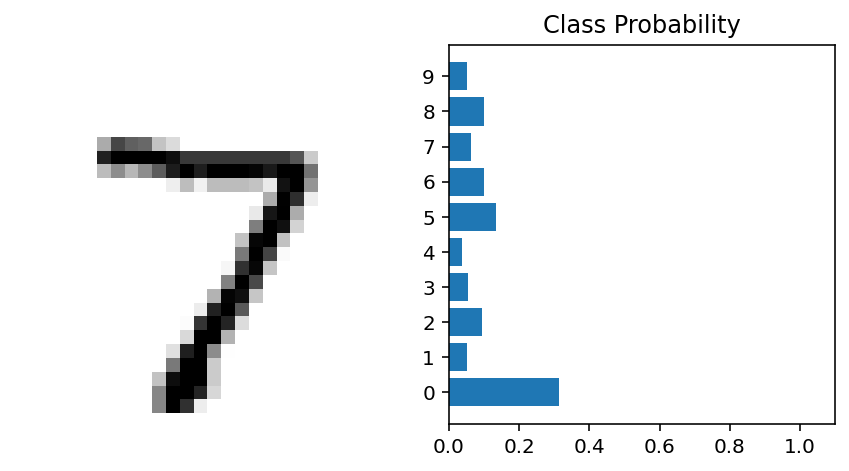

In [26]:
i = 0
ps = predictions[i]
first_image = X_test[i]


fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax2.barh(np.arange(10), ps)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()

모형을 훈련하지 않았기 때문에 위에서 보는 것처럼 제대로 된 결과가 출력되지 않는다. 

## Other Methods to Create Models

In [27]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
          
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 32)                25120     
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [28]:
layer_neurons = [512, 256, 128, 56, 28, 14]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))

for neurons in layer_neurons:
    model.add(tf.keras.layers.Dense(neurons, activation='relu'))
            
model.add(tf.keras.layers.Dense(10, activation='softmax'))
          
model.summary()        

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 56)                7224      
                                                                 
 dense_11 (Dense)            (None, 28)                1596      
                                                                 
 dense_12 (Dense)            (None, 14)               

## Clearing the Graph

이전 모형과 헷갈리는 것을 방지하기 위해 다음과 같이 실행 할 수 있다:

```python
tf.keras.backend.clear_session()
```

이 명령어는 `tf.keras` graph를  새로 생성한다.

In [29]:
tf.keras.backend.clear_session()

layer_neurons = [512, 256, 128, 56, 28, 14]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))

for neurons in layer_neurons:
    model.add(tf.keras.layers.Dense(neurons, activation='relu'))
            
model.add(tf.keras.layers.Dense(10, activation='softmax'))
          
model.summary()    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 56)                7224      
                                                                 
 dense_4 (Dense)             (None, 28)                1596      
                                                                 
 dense_5 (Dense)             (None, 14)                4